# Class 03
## Big Data Cleaning: Data Transformations

Although machine learning is the exciting part of this course, most data scientists spend the vast majority of their time doing data clearning and data wrangling. Some put the figure at as high as 90% of their time! There is a good reason for this: most of the data out there is not in a format needed for the machine learning algorithms. So, in order to do machine learning, the data must be reorganized, cleaned, rearranged, normalized, enriched, and filtered. We'll begin this process today and continue working on it through the course.

### Feature Types

We start with an overview of some of the types of features we could potentially use. In the end, all of the data are represented as bits in the computer (ones and zeros), but we can organize those bits in a bunch of different ways in the pandas dataframes. We'll build a "fake" dataframe with the different types in them.

#### Integers

Integers are counting numbers and other whole numbers (including negatives): ...,-4,-3,-2,-1,0,1,2,3,4,... They are somewhat special because they can be stored very efficiently and the computer can operate on them very efficiently (positive integers especially). Pandas stores these using a data type called **int64** where the 64 means they are 64-bit integers (capable of storing any number between -9,223,372,036,854,775,807 and 9,223,372,036,854,775,807)

We'll use a sample dataset to look at the different types of data as we go. Note that, when we load the dataset, we use the `stringsAsFactors = FALSE` option. By default `R` will change non-numeric columns into factors, but we don't want to do that just yet.

The `str()` function gives a nice overview of the structure of a data frame. It prints the column name, its data type, and a sample of the data in each column.

In [1]:
sampledata <- read.csv('Class03_sample_dataframe.csv', stringsAsFactors = FALSE)

# This will let us look at the data type of each column. Note that the first column is an "int".
str(sampledata)

# These are the values stored in this column.
print("Integer Values")
print(sampledata$IntCol)

'data.frame':	20 obs. of  7 variables:
 $ IntCol  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ FloatCol: num  1.35 1.66 1.99 2.16 2.5 ...
 $ TextCol : chr  "cat" "dog" "horse" "cow" ...
 $ CatCol  : chr  "no" "no" "yes" "no" ...
 $ DateCol : chr  "2017-01-25T11:10:15" "2017-01-26T00:06:43" "2017-01-26T21:11:33" "2017-01-27T06:44:09" ...
 $ LatCol  : num  -39.5 -70.1 -16.1 87.9 70.4 ...
 $ LonCol  : num  155 -38.5 29 -88.8 -84 ...
[1] "Integer Values"
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20


#### Floating point numbers

Floating point numbers, or decimal numbers are just that: any number with a decimal place in it such as 4.566642 and -156.986714. `R` calls these columns `num` for numeric. They could also be stored in scientific notation like this: 4.509013e+14. This means "4.509013 times 10 raised to the +14". These are still floating point numbers and are treated like any other decimal number.

In [2]:
print("Float Values")
print(sampledata$FloatCol)

[1] "Float Values"
 [1] 1.348465 1.658523 1.990915 2.158079 2.500187 2.602705 2.795402 3.013844
 [9] 3.191672 3.252009 3.460851 3.658682 3.790619 3.833512 3.946359 4.154751
[17] 4.279761 4.276088 4.446735 4.596708


Before we move on, I'd like to take a quick look at the data graphically.

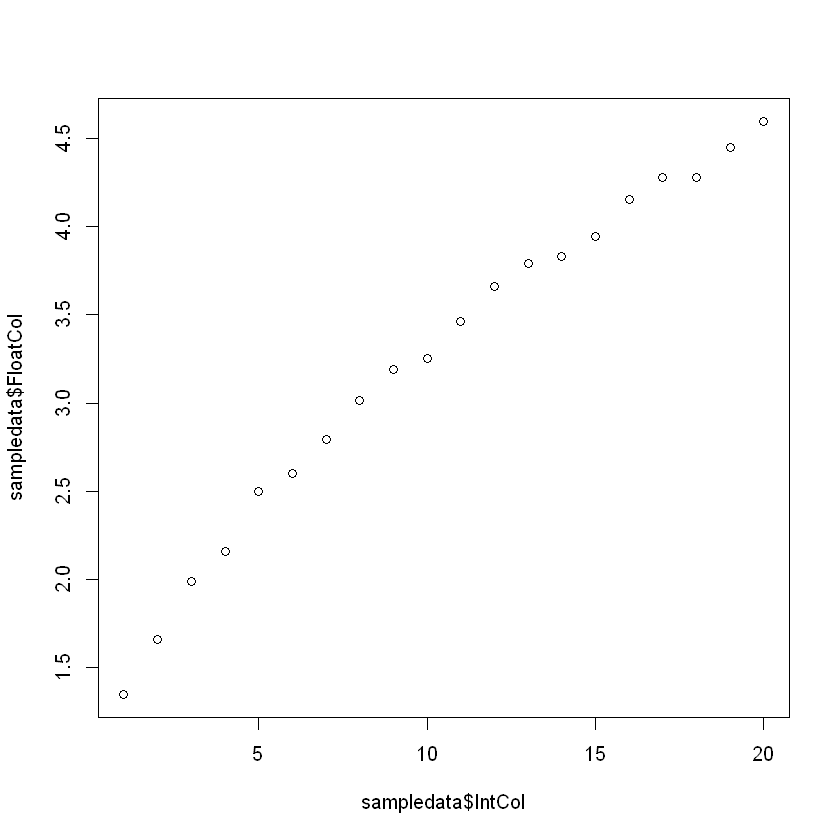

In [3]:
plot(sampledata$IntCol,sampledata$FloatCol)

Because this is "fake" data, I put in a functional dependence here. The float column looks like it is some function of the integer column. It is almost always a good idea to visualize your data early on to see what it looks like graphically!

#### Text

`R` stores text in character or `chr` columns. Text can, in principle, be anything you want it to be, so it is both the most flexible and the most challenging data type.

In [4]:
print("Text Values")
print(sampledata$TextCol)

[1] "Text Values"
 [1] "cat"         "dog"         "horse"       "cow"         "elephant"   
 [6] "fish"        "bird"        "dinosaur"    "giraffe"     "wolf"       
[11] "prairie dog" "whale"       "dolphin"     "clam"        "lizard"     
[16] "snake"       "fly"         "beetle"      "spider"      "worm"       


#### Categorical

A categorical, or 'factor', data type is a finite set of different text values. These strings are represented internally as integers but may be displayed as text or other generic objects. To make things simple, we'll start with a categorical object that has three possible values: "yes", "no", and "maybe". Internally, `R` will represent these as integers 0,1, and 2. But it knows that this is a categorical data type, so it keeps track of the text value associated with the integer and displays that for the user.

In [5]:
print("Categorical Values")
print(sampledata$CatCol)

[1] "Categorical Values"
 [1] "no"    "no"    "yes"   "no"    "yes"   "no"    "yes"   "yes"   "maybe"
[10] "no"    "no"    "no"    "no"    "no"    "yes"   "maybe" "no"    "yes"  
[19] "yes"   "yes"  


When we loaded the data, it actually loaded this column as a **chr** (because we set the `stringsAsFactors=FALSE` option) which means it doesn't know that it is supposed to be a categorical column. We will tell `R` to do that using the `as.factor()` function. We check to make sure it worked, too. Note that the "CatCol2" column is now a 'factor' type.

_**Data Processing Tip**_

A quick aside here: there are a couple of ways of doing this kind of transformation on the data. We'll see this a little later when we do more column-wise processing. We could either change the original column or we could create a new column. The second method doesn't overwrite the original data and will be what we typically do. That way if something goes wrong or we want to change how we are processing the data, we still have the original data column to work with.

In [6]:
sampledata$CatCol2 <- as.factor(sampledata$CatCol)
str(sampledata)

'data.frame':	20 obs. of  8 variables:
 $ IntCol  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ FloatCol: num  1.35 1.66 1.99 2.16 2.5 ...
 $ TextCol : chr  "cat" "dog" "horse" "cow" ...
 $ CatCol  : chr  "no" "no" "yes" "no" ...
 $ DateCol : chr  "2017-01-25T11:10:15" "2017-01-26T00:06:43" "2017-01-26T21:11:33" "2017-01-27T06:44:09" ...
 $ LatCol  : num  -39.5 -70.1 -16.1 87.9 70.4 ...
 $ LonCol  : num  155 -38.5 29 -88.8 -84 ...
 $ CatCol2 : Factor w/ 3 levels "maybe","no","yes": 2 2 3 2 3 2 3 3 1 2 ...


We can now look at how the data are stored as categorical data. Look at the output from the `str()` command above: the `CatCol2` column outputs a series of integers, not strings! We can get both the factors and the the internal codes for each of the entries like this:

In [7]:
print("Factors")
print(sampledata$CatCol2)
print("Codes")
print(as.numeric(sampledata$CatCol2))

[1] "Factors"
 [1] no    no    yes   no    yes   no    yes   yes   maybe no    no    no   
[13] no    no    yes   maybe no    yes   yes   yes  
Levels: maybe no yes
[1] "Codes"
 [1] 2 2 3 2 3 2 3 3 1 2 2 2 2 2 3 1 2 3 3 3


We can also get a list of the categories that `R` found when converting the column. These are in order- the first entry corresponds to 0, the second to 1, etc.

In [8]:
levels(sampledata$CatCol2)

[1] "maybe" "no"    "yes"

We may encounter situations where we want to plot the data and visualize each category as its own color. We saw how to do this back in Class01.

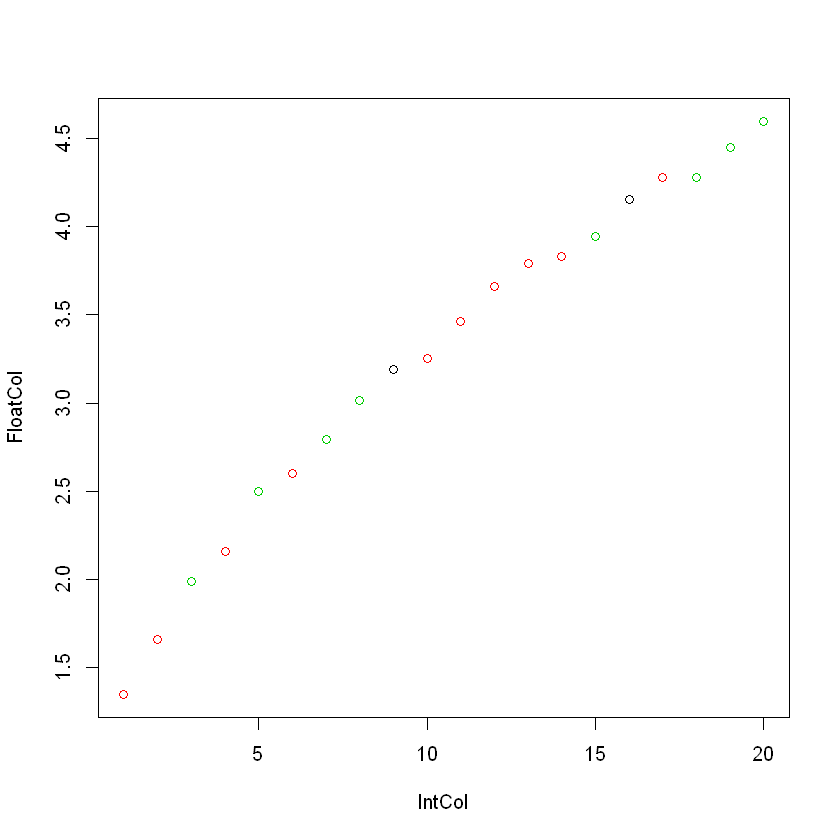

In [9]:
plot(FloatCol ~ IntCol, data=sampledata, col=CatCol2)

#### Date/Times

We will frequently encounter date/time values in working with data. There are many different ways that these values get stored, but mostly we'll find that they start as a text object. We need to know how they are stored (in what order are the year-month-day-hour-minute-second values are stored). There are utilities to convert any type of date/time string to a datetime object in pandas. We will start with the ISO 8601 datetime standard, since it is both the most logical and the easiest to work with. Dates are stored like this: **2017-01-23** where we use a four-digit year, then a two-digit month and a two-digit day, all separated by dashes. If we want to add a time, it is appended to the date like this: **2017-01-23T03:13:42**. The "T" tells the computer that we've added a time. Then it is followed by a two-digit hour (using 00 as midnight and 23 as 11pm) a colon, a two-digit minute, a colon, and a two-digit second. There are other variations of this that can include a time-zone, but we will leave those for later. 

In [10]:
print("Date/Time Values")
print(sampledata$DateCol)

[1] "Date/Time Values"
 [1] "2017-01-25T11:10:15" "2017-01-26T00:06:43" "2017-01-26T21:11:33"
 [4] "2017-01-27T06:44:09" "2017-01-27T20:55:49" "2017-01-28T03:26:11"
 [7] "2017-01-28T17:50:22" "2017-01-29T04:02:27" "2017-01-29T15:19:37"
[10] "2017-01-29T18:03:21" "2017-01-30T00:06:48" "2017-01-30T14:10:13"
[13] "2017-01-31T10:56:47" "2017-01-31T12:03:30" "2017-01-31T18:25:47"
[16] "2017-02-01T16:11:57" "2017-02-02T10:41:38" "2017-02-02T23:53:35"
[19] "2017-02-03T22:16:36" "2017-02-04T06:41:42"


They are currently stored as **chr**, not as datetimes. We need to convert this column as well. There is an `R` function that does this for us: `as.POSIXct`. 

That means that the date format is capable of counting nanoseconds. We won't use all of that capability, but pandas used that format because our dates are accurate to the second.

In [11]:
sampledata$DateCol2 <- as.POSIXct(sampledata$DateCol)
str(sampledata)

'data.frame':	20 obs. of  9 variables:
 $ IntCol  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ FloatCol: num  1.35 1.66 1.99 2.16 2.5 ...
 $ TextCol : chr  "cat" "dog" "horse" "cow" ...
 $ CatCol  : chr  "no" "no" "yes" "no" ...
 $ DateCol : chr  "2017-01-25T11:10:15" "2017-01-26T00:06:43" "2017-01-26T21:11:33" "2017-01-27T06:44:09" ...
 $ LatCol  : num  -39.5 -70.1 -16.1 87.9 70.4 ...
 $ LonCol  : num  155 -38.5 29 -88.8 -84 ...
 $ CatCol2 : Factor w/ 3 levels "maybe","no","yes": 2 2 3 2 3 2 3 3 1 2 ...
 $ DateCol2: POSIXct, format: "2017-01-25" "2017-01-26" ...


In [12]:
#We print out the column to see what it looks like
sampledata$DateCol2

 [1] "2017-01-25 EST" "2017-01-26 EST" "2017-01-26 EST" "2017-01-27 EST"
 [5] "2017-01-27 EST" "2017-01-28 EST" "2017-01-28 EST" "2017-01-29 EST"
 [9] "2017-01-29 EST" "2017-01-29 EST" "2017-01-30 EST" "2017-01-30 EST"
[13] "2017-01-31 EST" "2017-01-31 EST" "2017-01-31 EST" "2017-02-01 EST"
[17] "2017-02-02 EST" "2017-02-02 EST" "2017-02-03 EST" "2017-02-04 EST"

Now that we have the datetime column, I'd like to plot the data as a function of date. This is often a useful thing to do with time series data. 

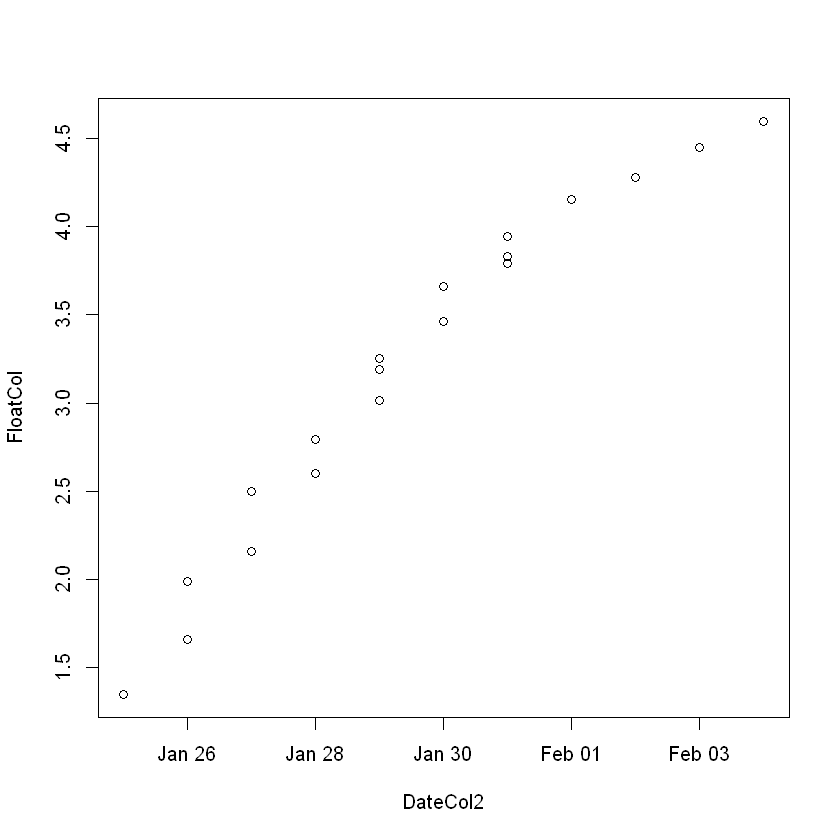

In [13]:
plot(FloatCol ~ DateCol2, data=sampledata)


#### Geographical

Although this is not typically a single data type, you may encounter geographical data. These are typically in a Latitude-Longitude format where both Latitude and Longitude are floating point numbers like this: (32.1545, -138.5532). There are a number of tools we can use to work with and plot this type of data, so I wanted to cover it now. For now, we will treat these as separate entities and work with geographical data as we encounter it.

In [14]:
print("Latitude Values")
print(sampledata$LatCol)
print("Longitude Values")
print(sampledata$LonCol)

[1] "Latitude Values"
 [1] -39.490656 -70.129489 -16.131740  87.892177  70.449436  58.054347
 [7]  -2.539728 -62.799572 -82.551621 -70.173209 -25.365871 -75.606023
[13]  -7.530937 -42.981486  66.793960  25.041393   1.831677   8.002090
[19]  33.873118  37.141398
[1] "Longitude Values"
 [1]  155.028043  -38.543047   29.020280  -88.757561  -83.950662 -115.376432
 [7]  -68.055900  -29.098916  -45.483970   79.369557 -154.233036    8.000612
[13] -173.339527  -75.006150 -113.625293   -1.752224  -33.072740  138.938207
[19]  102.868765   69.725813


It is also useful to plot the geographical data. There are `R` libraries that make this easy to do.

Warning message:
"package 'ggmap' was built under R version 3.3.3"Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=-5.311037,-21.867209&zoom=2&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
"Removed 8 rows containing missing values (geom_point)."

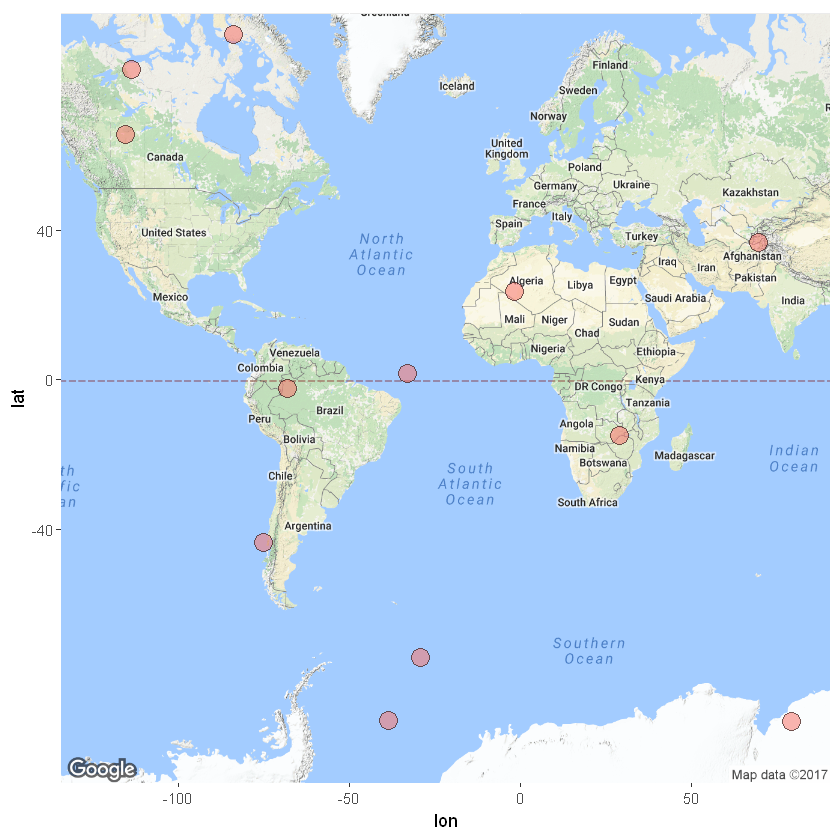

In [15]:
# loading the required packages
library(ggplot2)
library(ggmap)

# getting the map
mapbase <- get_map(location = c(lon = mean(sampledata$LonCol), lat = mean(sampledata$LatCol)),zoom=2)

# plotting the map with some points on it
ggmap(mapbase) +
  geom_point(data = sampledata, aes(x = LonCol, y = LatCol, fill = "red", alpha = 0.8), size = 5, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)

### Column-wise processing

Now that we have data columns, we've already seen a couple of examples of column-wise processing. When we created the categorical column and the datetime column we took the data from one column and operated on it all at the same time creating the new columns with the different data types. There are other ways to manipulate the columns.

#### lapply

The `lapply` function takes each entry in a column and *applies* whatever function you want to the entry. For example, we are interested in whether the entry is greater than 4. We will simplify the code by making our own quick `function()`. Whatever we put in the argument for this function becomes the thing that will be calculated. For example, if we put in `function(x) x>4`, this is shorthand notation for the following:

"Treat `x` as if it were each entry in the column. Apply whatever follows the `function(x)` to each entry and create a new column based on the output". The use of `x` was arbitrary: we could choose any variable. For example if we chose `w`, the code would read: `function(w) w>4`. This would do exactly the same thing.

In [16]:
sampledata$GTfour <- lapply(sampledata$FloatCol,function(x) x > 4.0)
print(sampledata[c('FloatCol','GTfour')])

   FloatCol GTfour
1  1.348465  FALSE
2  1.658523  FALSE
3  1.990915  FALSE
4  2.158079  FALSE
5  2.500187  FALSE
6  2.602705  FALSE
7  2.795402  FALSE
8  3.013844  FALSE
9  3.191672  FALSE
10 3.252009  FALSE
11 3.460851  FALSE
12 3.658682  FALSE
13 3.790619  FALSE
14 3.833512  FALSE
15 3.946359  FALSE
16 4.154751   TRUE
17 4.279761   TRUE
18 4.276088   TRUE
19 4.446735   TRUE
20 4.596708   TRUE


#### Common functions

There are a number of common functions that we could use inside the `lapply`. For example, if we wanted to get the square root of each entry, this is what it would look like.

In [17]:
sampledata$FloatSQRT <- lapply(sampledata$FloatCol,sqrt)
print(sampledata[c('FloatCol','FloatSQRT')])

   FloatCol FloatSQRT
1  1.348465  1.161234
2  1.658523  1.287837
3  1.990915  1.410998
4  2.158079   1.46904
5  2.500187  1.581198
6  2.602705   1.61329
7  2.795402  1.671945
8  3.013844  1.736043
9  3.191672  1.786525
10 3.252009  1.803333
11 3.460851  1.860336
12 3.658682  1.912768
13 3.790619  1.946951
14 3.833512  1.957936
15 3.946359  1.986545
16 4.154751  2.038321
17 4.279761  2.068758
18 4.276088   2.06787
19 4.446735  2.108728
20 4.596708  2.143993


Another useful function is adding up columns. There is a simple function in R to do this:

In [18]:
colSums(sampledata[c('IntCol','FloatCol')])

IntCol  FloatCol 
210.00000  64.95587

#### Custom functions

We will now create our first custom function and use it to process the data. We will make a short function that will look to see if a value in the TextCol feature matches an item on a list we create.

In [19]:

# We first tell the computer that we are writing a function and assigning it a name. The function name is the first thing.
# We name this one "isMammal" meaning it will tell us if an animal is in our list of mammals. Next we tell R that we are
# assigning a function() to this name.
# The final text in the parenthesis is an input to the function. This is another "dummy" variable - we could give it any name we want. 
# In this case we call it "animal" to remind ourselves that we expect an animal type in text form.
# We have to wrap the text of the function in {} so that R knows where the function starts and stops.
isMammal <- function(animal){
    # We create a list of text objects that will be our "inclusive" list. If the item is on this list, the function will return True. Otherwise it returns false.
    mammallist <- c('cat','dog','horse','cow','elephant','giraffe','wolf','prairie dog', 'whale', 'dolphin')
    # This is our first "if" statement. What this particular version does is look at the list "mammallist". 
    # If the text passed into the variable "animal" matches any item in the list, it jumps into this next block of code
    # Otherwise it jumps into block of code following the "else" statement
    if (animal %in% mammallist){
        # the "return" code word tells the computer we are done and to send back to the apply function the value following "return". In this case, send back "True"
        return('mammal')
        }
    else {
        # The other case will send back "false".
        return('notmammal')
        }
    }
sampledata$IsMammal <- lapply(sampledata$TextCol,isMammal)
print(sampledata[c('TextCol', 'IsMammal')])

       TextCol  IsMammal
1          cat    mammal
2          dog    mammal
3        horse    mammal
4          cow    mammal
5     elephant    mammal
6         fish notmammal
7         bird notmammal
8     dinosaur notmammal
9      giraffe    mammal
10        wolf    mammal
11 prairie dog    mammal
12       whale    mammal
13     dolphin    mammal
14        clam notmammal
15      lizard notmammal
16       snake notmammal
17         fly notmammal
18      beetle notmammal
19      spider notmammal
20        worm notmammal


In [20]:
# We'll now operate on an entire row of data at once and do a more complicated operation. We'll return only mammals where the 'FloatCol' is smaller than 2.

isMammalFloat <- function(animalcol, floatcol){
    # We create a list of text objects that will be our "inclusive" list. If the item is on this list, the function will return True. Otherwise it returns false.
    mammallist <- c('cat','dog','horse','cow','elephant','giraffe','wolf','prairie dog', 'whale', 'dolphin')
       
    if( animalcol %in% mammallist){
        # the "return" code word tells the computer we are done and to send back to the apply function the value following "return". 
        # In this case it returns True if the float value is less than 2 and false otherwise.
        return (floatcol < 2)
        }
    else {
        # If it isn't a mammal, return false
        return( FALSE)
        }
    }

# Note that we are using a slightly different function: mapply. This takes the custom function first, then passes in the 
# columns from the dataframe that we need as the arguments.
sampledata$IsSmallMammal <- mapply(isMammalFloat,sampledata$TextCol, sampledata$FloatCol)
print(sampledata[c('TextCol', 'FloatCol','IsSmallMammal')])

       TextCol FloatCol IsSmallMammal
1          cat 1.348465          TRUE
2          dog 1.658523          TRUE
3        horse 1.990915          TRUE
4          cow 2.158079         FALSE
5     elephant 2.500187         FALSE
6         fish 2.602705         FALSE
7         bird 2.795402         FALSE
8     dinosaur 3.013844         FALSE
9      giraffe 3.191672         FALSE
10        wolf 3.252009         FALSE
11 prairie dog 3.460851         FALSE
12       whale 3.658682         FALSE
13     dolphin 3.790619         FALSE
14        clam 3.833512         FALSE
15      lizard 3.946359         FALSE
16       snake 4.154751         FALSE
17         fly 4.279761         FALSE
18      beetle 4.276088         FALSE
19      spider 4.446735         FALSE
20        worm 4.596708         FALSE


### Feature extraction

We can often pull additional features from what we currently have. This involves doing a column-wise processing step, but with the additional component of doing a transformation or extraction from the data. We'll look at a couple of techniques to do this.

#### Date/day/week features

We already saw how to take a text column that is a date and turn it into a datetime data type. The `as.POSIXct()` function has the capability of parsing many different string formats.

Once we have a datetime data type, we can use other functions to get, for example, the day of the week or the week of the year for any given date. This may be useful for looking at weekly patterns or yearly patterns. Read the [documentation on the `strftime()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/strptime.html) to get more details on the kinds of things you can extract this way.

In [21]:
# Get the day of the week for each of the data features. We can get either a numerical value (0-6) or the names
sampledata$DayofWeek <- strftime(sampledata$DateCol2,format="%A")
# Or the week number in the year - we use the strftime function to get the week as a string, then turn it back into a number
sampledata$WeekofYear <- as.numeric(strftime(sampledata$DateCol2,format="%W"))

print(sampledata[c('DateCol2','DayofWeek', 'WeekofYear')])

     DateCol2 DayofWeek WeekofYear
1  2017-01-25 Wednesday          4
2  2017-01-26  Thursday          4
3  2017-01-26  Thursday          4
4  2017-01-27    Friday          4
5  2017-01-27    Friday          4
6  2017-01-28  Saturday          4
7  2017-01-28  Saturday          4
8  2017-01-29    Sunday          4
9  2017-01-29    Sunday          4
10 2017-01-29    Sunday          4
11 2017-01-30    Monday          5
12 2017-01-30    Monday          5
13 2017-01-31   Tuesday          5
14 2017-01-31   Tuesday          5
15 2017-01-31   Tuesday          5
16 2017-02-01 Wednesday          5
17 2017-02-02  Thursday          5
18 2017-02-02  Thursday          5
19 2017-02-03    Friday          5
20 2017-02-04  Saturday          5


#### Unique values

Sometimes it is helpful to know what unique values are in a column. Especially when there are many rows (millions), it is impractical to manually scan through the columns to look for unique values. However, we can use an`R` function `unique()` to do just that. We will see this is particularly helpful in doing data cleaning to identify rows with problems in the data.

In [22]:
unique(sampledata$CatCol)

[1] "no"    "yes"   "maybe"

#### Text regex features

Another type of text feature extraction using a `regex` or *regular expression* pattern recognition code. The date/time conversion uses one form of this, but we can be more general in identifying patterns. There are some very useful tools for testing your pattern. I like the tester at https://regex101.com/. I use it whenever I build a pattern recognition string. 

In [23]:
# This simple text pattern looks for words that end in an `e`
grep("(.*)e$",sampledata$TextCol, value=TRUE)

[1] "horse"   "giraffe" "whale"   "snake"   "beetle"

#### Converting to categorical

We already saw how to convert text columns to categorical columns. We can also covert other data types to categorical columns. For example, we could bin a float column into regularly sized bins, then create a categorical column from those bins.

### Word/Text cleaning

Finally, it is often useful to clean up text entries before trying to turn them into features. For example, we may want to remove all punctuation, capital letters, or other special characters. We may also want to consider all of the forms of a word as the same word. For example, we may want to have both "dog" and "dogs" as the same feature. Or we may want "wonder" and "wonderful" as the same feature. There are a couple of text processing tools in python that simplify this work considerably.

I created a small dataset to work with. We'll use one of the rows to test our text cleaning process.

In [24]:
textDF <- read.csv('Class03_text.tsv',sep='\t', stringsAsFactors=FALSE)
testcase <- textDF[3,'review']
testcase

[1] "Minor Spoilers<br /><br />In New York, Joan Barnard (Elvire Audrey) is informed that her husband, the archeologist Arthur Barnard (John Saxon), was mysteriously murdered in Italy while searching an Etruscan tomb. Joan decides to travel to Italy, in the company of her colleague, who offers his support. Once in Italy, she starts having visions relative to an ancient people and maggots, many maggots. After shootings and weird events, Joan realizes that her father is an international drug dealer, there are drugs hidden in the tomb and her colleague is a detective of the narcotic department. The story ends back in New York, when Joan and her colleague decide to get married with each other, in a very romantic end. Yesterday I had the displeasure of wasting my time watching this crap. The story is so absurd, mixing thriller, crime, supernatural and horror (and even a romantic end) in a non-sense way. The acting is the worst possible, highlighting the horrible performance of the beautiful Elvire Audrey. John Saxon just gives his name to the credits and works less than five minutes, when his character is killed. The special effects are limited to maggots everywhere. The direction is ridiculous. I lost a couple of hours of my life watching 'Assassinio al Cimitero Etrusco'. If you have the desire or curiosity of seeing this trash, choose another movie, go to a pizzeria, watch TV, go sleep, navigate in Internet, go to the gym, but do not waste your time like I did. My vote is two.<br /><br />Title (Brazil): 'O MistÃ©rio Etrusco' ('The Etruscan Mystery')"

The first thing we notice is that there are hypertext bits in the text (the `<br />` items). We want to clean all of those out. There is a simple replacement function that looks for all `<>` pairs and replaces them with nothing.

In [25]:
cleantext <- gsub("<.*?>", " ", testcase)
cleantext

[1] "Minor Spoilers  In New York, Joan Barnard (Elvire Audrey) is informed that her husband, the archeologist Arthur Barnard (John Saxon), was mysteriously murdered in Italy while searching an Etruscan tomb. Joan decides to travel to Italy, in the company of her colleague, who offers his support. Once in Italy, she starts having visions relative to an ancient people and maggots, many maggots. After shootings and weird events, Joan realizes that her father is an international drug dealer, there are drugs hidden in the tomb and her colleague is a detective of the narcotic department. The story ends back in New York, when Joan and her colleague decide to get married with each other, in a very romantic end. Yesterday I had the displeasure of wasting my time watching this crap. The story is so absurd, mixing thriller, crime, supernatural and horror (and even a romantic end) in a non-sense way. The acting is the worst possible, highlighting the horrible performance of the beautiful Elvire Audrey. John Saxon just gives his name to the credits and works less than five minutes, when his character is killed. The special effects are limited to maggots everywhere. The direction is ridiculous. I lost a couple of hours of my life watching 'Assassinio al Cimitero Etrusco'. If you have the desire or curiosity of seeing this trash, choose another movie, go to a pizzeria, watch TV, go sleep, navigate in Internet, go to the gym, but do not waste your time like I did. My vote is two.  Title (Brazil): 'O MistÃ©rio Etrusco' ('The Etruscan Mystery')"

We'll get rid of upper-case letters to only look at the words themselves. We'll load and use a new library to do this. We first make the text into a `Corpus` object (which the library requires), then we use the `content_transformer` to change it to lower case.

In [26]:
library(tm)

documents <- Corpus(VectorSource(cleantext))
documents <- tm_map(documents, content_transformer(tolower))
documents[[1]]$content

Warning message:
"package 'tm' was built under R version 3.3.3"Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate



[1] "minor spoilers  in new york, joan barnard (elvire audrey) is informed that her husband, the archeologist arthur barnard (john saxon), was mysteriously murdered in italy while searching an etruscan tomb. joan decides to travel to italy, in the company of her colleague, who offers his support. once in italy, she starts having visions relative to an ancient people and maggots, many maggots. after shootings and weird events, joan realizes that her father is an international drug dealer, there are drugs hidden in the tomb and her colleague is a detective of the narcotic department. the story ends back in new york, when joan and her colleague decide to get married with each other, in a very romantic end. yesterday i had the displeasure of wasting my time watching this crap. the story is so absurd, mixing thriller, crime, supernatural and horror (and even a romantic end) in a non-sense way. the acting is the worst possible, highlighting the horrible performance of the beautiful elvire audrey. john saxon just gives his name to the credits and works less than five minutes, when his character is killed. the special effects are limited to maggots everywhere. the direction is ridiculous. i lost a couple of hours of my life watching 'assassinio al cimitero etrusco'. if you have the desire or curiosity of seeing this trash, choose another movie, go to a pizzeria, watch tv, go sleep, navigate in internet, go to the gym, but do not waste your time like i did. my vote is two.  title (brazil): 'o mistã©rio etrusco' ('the etruscan mystery')"

We now want to get rid of everything that isn't an alphabetical letter. That will clean up all punctuation and get rid of all numbers. There is a function to to this, too.

In [27]:
documents <- tm_map(documents, removePunctuation)
documents[[1]]$content

[1] "minor spoilers  in new york joan barnard elvire audrey is informed that her husband the archeologist arthur barnard john saxon was mysteriously murdered in italy while searching an etruscan tomb joan decides to travel to italy in the company of her colleague who offers his support once in italy she starts having visions relative to an ancient people and maggots many maggots after shootings and weird events joan realizes that her father is an international drug dealer there are drugs hidden in the tomb and her colleague is a detective of the narcotic department the story ends back in new york when joan and her colleague decide to get married with each other in a very romantic end yesterday i had the displeasure of wasting my time watching this crap the story is so absurd mixing thriller crime supernatural and horror and even a romantic end in a nonsense way the acting is the worst possible highlighting the horrible performance of the beautiful elvire audrey john saxon just gives his name to the credits and works less than five minutes when his character is killed the special effects are limited to maggots everywhere the direction is ridiculous i lost a couple of hours of my life watching assassinio al cimitero etrusco if you have the desire or curiosity of seeing this trash choose another movie go to a pizzeria watch tv go sleep navigate in internet go to the gym but do not waste your time like i did my vote is two  title brazil o mistãrio etrusco the etruscan mystery"

The next two steps we'll do at once because we need to split up the text into individual words to do them. We will then eliminate any words that are **stopwords** in English. These are words like "and", "or", "the" that don't communciate any information but are necessary for language.

In [28]:
documents <- tm_map(documents, removeWords, stopwords("english"))
documents[[1]]$content

[1] "minor spoilers   new york joan barnard elvire audrey  informed   husband  archeologist arthur barnard john saxon  mysteriously murdered  italy  searching  etruscan tomb joan decides  travel  italy   company   colleague  offers  support   italy  starts  visions relative   ancient people  maggots many maggots  shootings  weird events joan realizes   father   international drug dealer   drugs hidden   tomb   colleague   detective   narcotic department  story ends back  new york  joan   colleague decide  get married       romantic end yesterday    displeasure  wasting  time watching  crap  story   absurd mixing thriller crime supernatural  horror  even  romantic end   nonsense way  acting   worst possible highlighting  horrible performance   beautiful elvire audrey john saxon just gives  name   credits  works less  five minutes   character  killed  special effects  limited  maggots everywhere  direction  ridiculous  lost  couple  hours   life watching assassinio al cimitero etrusco     desire  curiosity  seeing  trash choose another movie go   pizzeria watch tv go sleep navigate  internet go   gym    waste  time like    vote  two  title brazil o mistãrio etrusco  etruscan mystery"

The other thing we'll do is cut the words down to their root stems. This will get rid of plurals or other modifications of words.

In [29]:
documents <- tm_map(documents, stemDocument, language = "english")  
documents[[1]]$content

[1] "minor spoiler new york joan barnard elvir audrey inform husband archeologist arthur barnard john saxon mysteri murder itali search etruscan tomb joan decid travel itali compani colleagu offer support itali start vision relat ancient peopl maggot mani maggot shoot weird event joan realiz father intern drug dealer drug hidden tomb colleagu detect narcot depart stori end back new york joan colleagu decid get marri romant end yesterday displeasur wast time watch crap stori absurd mix thriller crime supernatur horror even romant end nonsens way act worst possibl highlight horribl perform beauti elvir audrey john saxon just give name credit work less five minut charact kill special effect limit maggot everywher direct ridicul lost coupl hour life watch assassinio al cimitero etrusco desir curios see trash choos anoth movi go pizzeria watch tv go sleep navig internet go gym wast time like vote two titl brazil o mistãrio etrusco etruscan mysteri"

Now we want to do this to the entire dataframe. Fortunately, this is really easy: we just need to send the entire dataframe through the same process.

In [30]:
cleantext <- lapply(textDF$review,function(x) gsub("<.*?>", " ", x))
documents <- Corpus(VectorSource(cleantext))
documents <- tm_map(documents, content_transformer(tolower))
documents <- tm_map(documents, removePunctuation)
documents <- tm_map(documents, removeWords, stopwords("english"))
documents <- tm_map(documents, stemDocument, language = "english") 
textDF$finaltext<-documents$content
textDF

id,review,finaltext


## Data Cleaning Example In-class Activity

A tutorial on cleaning messy data is located here: http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%207%20-%20Cleaning%20up%20messy%20data.ipynb, but the tutorial is written for Python. Using what you know about the different data steps, do a preliminary clean on the data.

In [31]:
requests <- read.csv("Class03_311_data.csv", stringsAsFactors=FALSE)

# Assignment

Your assignment is to do data processing and cleaning on your own dataset. I want documentation of what you've done and why you chose to do those things to your data. 

I would also like you to try redoing your regression from last week, using the new features that you create through the data processing steps. See if you can improve the quality of your regression.
